https://www.infiniteloop.co.jp/blog/2018/02/learning-keras-06/  
2018年02月06日 (火) 著者 ： nobuh 

# MNISTデータの取得

In [1]:
from keras.datasets import mnist

# x1: 入力データ
# t1: 正解データ（ターゲット）
# ex1: 評価用入力データ
# et1: 評価用正解データ（ターゲット）
(x1,t1),(ex1,et1)=mnist.load_data()

Using TensorFlow backend.


In [2]:
print("x1.shape = ",x1.shape)
print("t1.shape = ",t1.shape)

x1.shape =  (60000, 28, 28)
t1.shape =  (60000,)


In [3]:
import numpy as np

np.set_printoptions(edgeitems=28)
np.core.arrayprint._line_width=200
print(x1[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [4]:
x2=x1.reshape(len(x1),x1[0].size) # 60000, 28x28に
ex2=ex1.reshape(len(ex1),ex1[0].size)

In [5]:
print(x2.shape,ex2.shape)

(60000, 784) (10000, 784)


In [6]:
print(t1[0])

5


In [7]:
from keras.utils import np_utils

t2=np_utils.to_categorical(t1)
et2=np_utils.to_categorical(et1)

# 訓練用と評価用から1個ずつ表示
print(t2[0])
print(et2[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


# モデルの作成と学習

In [8]:
from keras.layers import Dense,Activation
from keras.models import Sequential
from keras.optimizers import SGD

n_in=x2[0].size
n_out=t2[0].size
hidden_layers=2
hidden_units=30
activation_function="sigmoid"
learning_rate=0.1

# モデル定義
np.random.seed(0) # 乱数を固定値で初期化し再現性を持たせる
model=Sequential()

# 入力層
model.add(Dense(hidden_units,input_dim=n_in)) # 入力層から出力するユニット数は隠し層のユニット数と同数に
model.add(Activation(activation_function))

# 隠し層
for _ in range(hidden_layers):
    model.add(Dense(hidden_units))
    model.add(Activation(activation_function))
    
# 出力層
model.add(Dense(n_out))
model.add(Activation("softmax"))

# モデル生成
model.compile(loss="categorical_crossentropy",optimizer=SGD(lr=learning_rate))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
epochs=5
batch_size=50
model.fit(x2,t2,epochs=epochs,batch_size=batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 5s 80us/step - loss: 1.5773
Epoch 2/5
60000/60000 [==============================] - 4s 64us/step - loss: 1.0760
Epoch 3/5
60000/60000 [==============================] - 4s 64us/step - loss: 1.0766
Epoch 4/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.9981
Epoch 5/5
60000/60000 [==============================] - 4s 62us/step - loss: 1.0105


In [10]:
result=model.predict_classes(ex2,batch_size=batch_size)
print()
print("**** RESULT ****")
_,et3=np.where(et2>0) # to_categoricalの逆変換
print(result==et3)


**** RESULT ****
[ True  True  True  True  True  True False False  True  True  True False
  True  True  True False False  True  True  True False  True False False
  True  True  True  True ...  True  True  True False  True  True  True
  True False  True False  True  True False  True  True False  True  True
 False False  True  True False  True False False  True]


In [11]:
sum(result==et3)/10000

0.653

# Keras内で評価を測定する

In [12]:
# モデル生成
model.compile(loss="categorical_crossentropy",optimizer=SGD(lr=learning_rate),metrics=["accuracy"])
model.fit(x2,t2,epochs=epochs,batch_size=batch_size)

Epoch 1/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.9593 - acc: 0.6748
Epoch 2/5
60000/60000 [==============================] - 4s 63us/step - loss: 1.0103 - acc: 0.6556
Epoch 3/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.9863 - acc: 0.6682
Epoch 4/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.9908 - acc: 0.6623
Epoch 5/5
60000/60000 [==============================] - 4s 73us/step - loss: 1.0042 - acc: 0.6562


In [13]:
model.metrics_names

['loss', 'acc']

In [14]:
"""
結果評価
"""

result=model.evaluate(ex2,et2)
print("**** RESULT ****")
print("Accuracy = ",result[1]) # 2つ目がacc

10000/10000 [==============================] - 1s 70us/step
**** RESULT ****
Accuracy =  0.605


# 学習過程の可視化

In [15]:
result=model.fit(x2,t2,epochs=epochs,batch_size=batch_size,validation_data=(ex2,et2)) # 評価用データを付けて学習

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 70us/step - loss: 1.0131 - acc: 0.6462 - val_loss: 1.0778 - val_acc: 0.6127
Epoch 2/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.9609 - acc: 0.6692 - val_loss: 0.9307 - val_acc: 0.6899
Epoch 3/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.9462 - acc: 0.6729 - val_loss: 0.9040 - val_acc: 0.6720
Epoch 4/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.8881 - acc: 0.6915 - val_loss: 0.8092 - val_acc: 0.7317
Epoch 5/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.8851 - acc: 0.6826 - val_loss: 0.8364 - val_acc: 0.7073


In [16]:
result.history.keys() # ヒストリーデータのラベルを見てみる

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

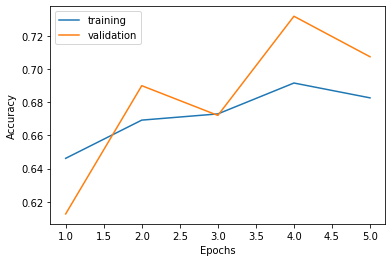

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1,epochs+1),result.history["acc"],label="training")
plt.plot(range(1,epochs+1),result.history["val_acc"],label="validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# チューニング: 学習率

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.8177 - acc: 0.7237 - val_loss: 0.7964 - val_acc: 0.7345
Epoch 2/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.7917 - acc: 0.7330 - val_loss: 0.7801 - val_acc: 0.7402
Epoch 3/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.7723 - acc: 0.7426 - val_loss: 0.7534 - val_acc: 0.7521
Epoch 4/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.7566 - acc: 0.7489 - val_loss: 0.7378 - val_acc: 0.7562
Epoch 5/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.7458 - acc: 0.7535 - val_loss: 0.7243 - val_acc: 0.7638


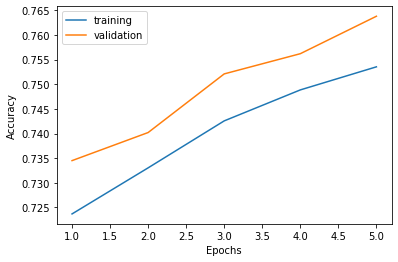

In [18]:
learning_rate=0.01 # 学習率を0.01に下げる

model.compile(loss="categorical_crossentropy",optimizer=SGD(lr=learning_rate),metrics=["accuracy"])
result=model.fit(x2,t2,epochs=epochs,batch_size=batch_size,validation_data=(ex2,et2)) # 評価用データを付けて学習

plt.plot(range(1,epochs+1),result.history["acc"],label="training")
plt.plot(range(1,epochs+1),result.history["val_acc"],label="validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# チューニング: 中間層追加

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 121us/step - loss: 2.3079 - acc: 0.1101 - val_loss: 2.3014 - val_acc: 0.1135
Epoch 2/5
60000/60000 [==============================] - 5s 84us/step - loss: 2.3016 - acc: 0.1113 - val_loss: 2.3012 - val_acc: 0.1135
Epoch 3/5
60000/60000 [==============================] - 5s 86us/step - loss: 2.3017 - acc: 0.1117 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 4/5
60000/60000 [==============================] - 5s 86us/step - loss: 2.3017 - acc: 0.1122 - val_loss: 2.3015 - val_acc: 0.1135
Epoch 5/5
60000/60000 [==============================] - 5s 89us/step - loss: 2.3016 - acc: 0.1121 - val_loss: 2.3014 - val_acc: 0.1135


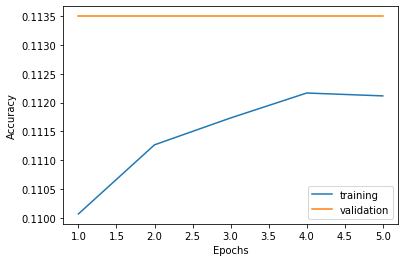

In [19]:
hidden_layers=10 # 中間層の数を10に

# モデル定義
np.random.seed(0) # 乱数を固定値で初期化し再現性を持たせる
model=Sequential()

# 入力層
model.add(Dense(hidden_units,input_dim=n_in)) # 入力層から出力するユニット数は隠し層のユニット数と同数に
model.add(Activation(activation_function))

# 隠し層
for _ in range(hidden_layers):
    model.add(Dense(hidden_units))
    model.add(Activation(activation_function))
    
# 出力層
model.add(Dense(n_out))
model.add(Activation("softmax"))

# モデル生成
model.compile(loss="categorical_crossentropy",optimizer=SGD(lr=learning_rate),metrics=["accuracy"])

result=model.fit(x2,t2,epochs=epochs,batch_size=batch_size,validation_data=(ex2,et2)) # 評価用データを付けて学習

plt.plot(range(1,epochs+1),result.history["acc"],label="training")
plt.plot(range(1,epochs+1),result.history["val_acc"],label="validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# チューニング: 活性化関数

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 13s 222us/step - loss: 0.6824 - acc: 0.7826 - val_loss: 0.3572 - val_acc: 0.8958
Epoch 2/5
60000/60000 [==============================] - 11s 183us/step - loss: 0.3127 - acc: 0.9108 - val_loss: 0.2560 - val_acc: 0.9270
Epoch 3/5
60000/60000 [==============================] - 10s 174us/step - loss: 0.2463 - acc: 0.9298 - val_loss: 0.2500 - val_acc: 0.9287
Epoch 4/5
60000/60000 [==============================] - 10s 174us/step - loss: 0.2110 - acc: 0.9402 - val_loss: 0.1992 - val_acc: 0.9423
Epoch 5/5
60000/60000 [==============================] - 11s 180us/step - loss: 0.1890 - acc: 0.9458 - val_loss: 0.1995 - val_acc: 0.9436


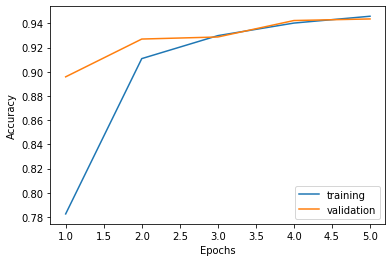

In [20]:
activation_function="relu" # 活性化関数をReLUにする

# モデル定義
np.random.seed(0) # 乱数を固定値で初期化し再現性を持たせる
model=Sequential()

# 入力層
model.add(Dense(hidden_units,input_dim=n_in)) # 入力層から出力するユニット数は隠し層のユニット数と同数に
model.add(Activation(activation_function))

# 隠し層
for _ in range(hidden_layers):
    model.add(Dense(hidden_units))
    model.add(Activation(activation_function))
    
# 出力層
model.add(Dense(n_out))
model.add(Activation("softmax"))

# モデル生成
model.compile(loss="categorical_crossentropy",optimizer=SGD(lr=learning_rate),metrics=["accuracy"])

result=model.fit(x2,t2,epochs=epochs,batch_size=batch_size,validation_data=(ex2,et2)) # 評価用データを付けて学習

plt.plot(range(1,epochs+1),result.history["acc"],label="training")
plt.plot(range(1,epochs+1),result.history["val_acc"],label="validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()